# Лабораторная работа №4: Классификация в sklearn + метрики классификации
---------------

### Шаина Мария 6132-010402D

In [1]:
# Импортируем необходимые библиотеки 
import numpy as np
import pandas as pd
import seaborn as sns 
import os

from sklearn import svm,  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

%pylab inline
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1.  Многоклассовая классификация:

1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.
2. То же самое с использованием кросс-валидации
3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)
4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). 

In [2]:
# Загрузка датасета
from sklearn.datasets import load_wine, make_classification
data = load_wine()
X, y = data.data, data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9887640449438202


In [3]:
# вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler):
# Нормализация признаков с использованием StandardScaler

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9662921348314607


In [4]:
# ii. То же самое с использованием кросс-валидации

from sklearn.model_selection import cross_val_score


# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()

# Оценка производительности модели с использованием кросс-валидации
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 означает 5-кратную кросс-валидацию
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

# Обучение модели на всем обучающем наборе
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy Scores: [1.         0.95238095 1.         0.95238095 1.        ]
Average Accuracy: 0.980952380952381
Test Accuracy: 0.9444444444444444


In [5]:
# вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler):
# Нормализация признаков с использованием StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()

# Оценка производительности модели с использованием кросс-валидации
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 означает 5-кратную кросс-валидацию
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

# Обучение модели на всем обучающем наборе
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy Scores: [1.         0.95238095 1.         1.         1.        ]
Average Accuracy: 0.9904761904761905
Test Accuracy: 0.9444444444444444


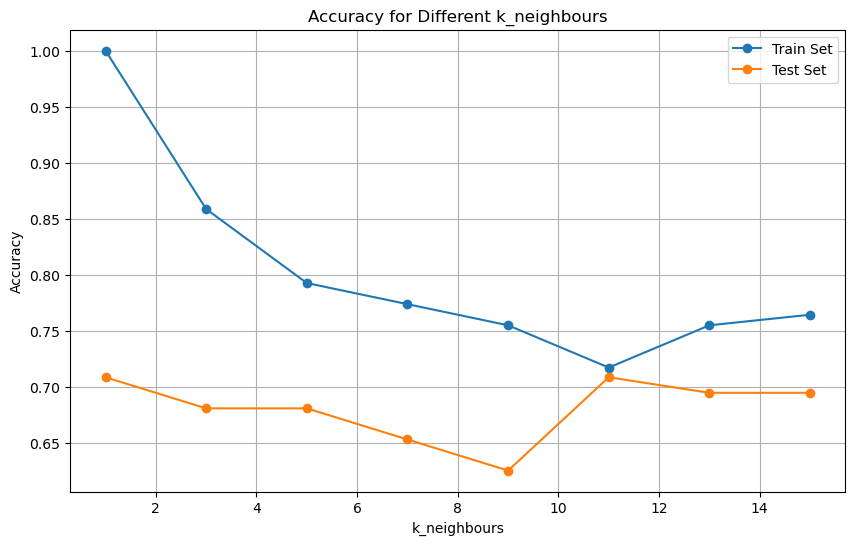

In [6]:
# iii. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Загрузка датасета
data = load_wine()
X, y = data.data, data.target

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Используем разные значения гиперпараметра k_neighbours
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_scores = []
test_scores = []

for k in k_values:
    # Создание и обучение модели kNN
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Прогнозирование классов на обучающем и тестовом наборах
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Оценка точности (accuracy) модели
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Добавление точности в списки
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Построение графика точности для разных значений гиперпараметра
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Set')
plt.plot(k_values, test_scores, marker='o', label='Test Set')
plt.xlabel('k_neighbours')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k_neighbours')
plt.legend()
plt.grid(True)
plt.show()


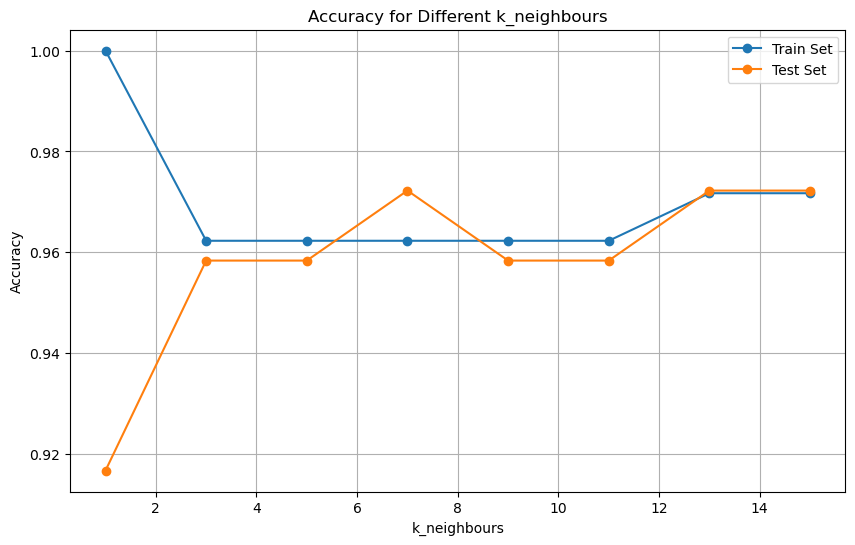

In [7]:
# Нормализация признаков с использованием StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4)

# Используем разные значения гиперпараметра k_neighbours
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
train_scores = []
test_scores = []

for k in k_values:
    # Создание и обучение модели kNN
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Прогнозирование классов на обучающем и тестовом наборах
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Оценка точности (accuracy) модели
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Добавление точности в списки
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Построение графика точности для разных значений гиперпараметра
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Set')
plt.plot(k_values, test_scores, marker='o', label='Test Set')
plt.xlabel('k_neighbours')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k_neighbours')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9861111111111112
Confusion Matrix:
[[29  0  0]
 [ 0 24  1]
 [ 0  0 18]]


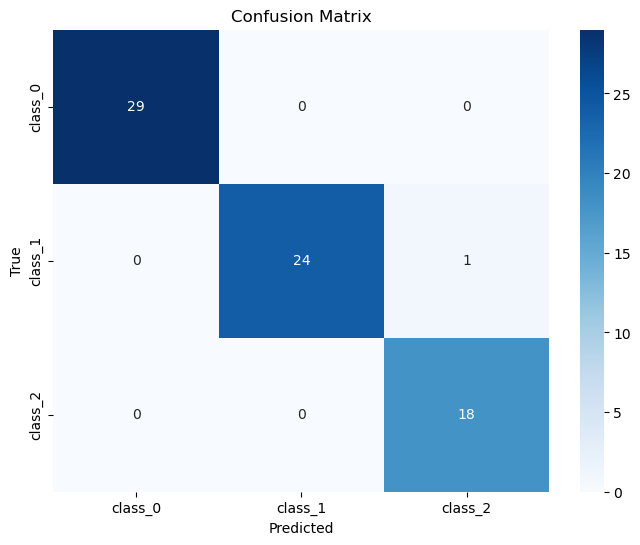

In [8]:
# iv. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Загрузка датасета
data = load_wine()
X, y = data.data, data.target

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Построение матрицы ошибок (confusion matrix)
labels = data.target_names
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9861111111111112
Confusion Matrix:
[[26  0  0]
 [ 1 24  0]
 [ 0  0 21]]


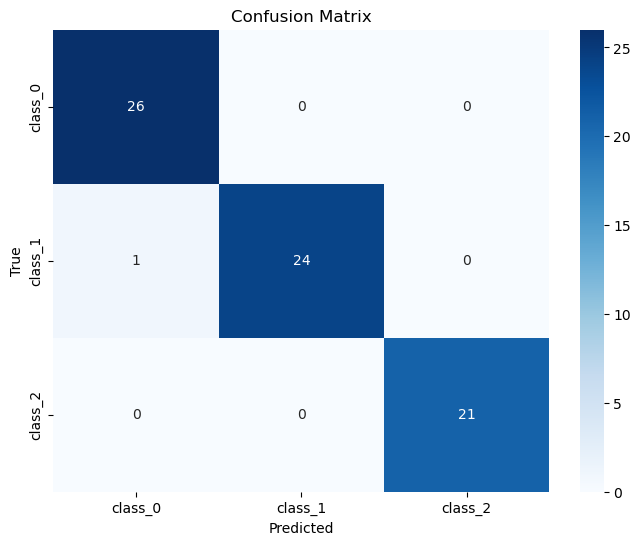

In [9]:
# Нормализация признаков с использованием StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение нормализованных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4)

# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Построение матрицы ошибок (confusion matrix)
labels = data.target_names
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 2. Бинарная классификация.

- Оценить метрики качества бинарного датасета;
- Нормализовать признаки (StandardScalerили MinMaxScaler);
- Оценить метрики качества в случае с ненормализованными признаками.

Описание датасета "титаник": one of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

In [10]:
titanic_data = pd.read_csv('titanic.csv', sep = ',')

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [12]:
#titanic_data.head()

Задача классификации:

    - Пассажир Титаника выжил/сспася - 1 класс;
    - Пассажир Титаника не выжил/не спасся - 2 класс.

In [13]:
# Предварительная обработка данных
columns_target = ['Survived'] # Наша целевая колонка 
columns_train = ['Sex', 'Pclass', 'Age', 'Fare']

In [14]:
X = titanic_data[columns_train]
Y = titanic_data[columns_target]

In [15]:
# Проверяем есть ли пустые значения в колонках 
s,p,a,f = X['Sex'].isnull().sum(), X['Pclass'].isnull().sum(), X['Age'].isnull().sum(), X['Fare'].isnull().sum()
print(f"Sex:{s}, Pclass:{p}, Age:{a}, Fare:{f}")

Sex:0, Pclass:0, Age:0, Fare:0


Отлично, двигаемся дальше

In [16]:
# Колонка 'Sex' содержит значения male, либо female. Заменим их на 0 и 1.
d = {"male": 0, "female": 1} #создание словаря с указанимем на заменяемые значения
X['Sex'] = X['Sex'].apply(lambda x: d[x])

/var/folders/4w/p733l7cs7rjbzrwpbknf3nl40000gn/T/ipykernel_64647/3611774807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x: d[x])


Разделим наш датасет на две выборки: 
- train - данные на которых модель будет обучаться; 
- test - данные на которых мы будем проверять нашу модель.

In [17]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 42)

Обучение модели

In [18]:
# Обучим модель, применив метод опорных векторов (Support Vectore Machine)
predmodel = svm.LinearSVC()

In [19]:
# Обучим модель с помощью обучающей выборки и функции fit
predmodel.fit(X_train, Y_train)

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [20]:
# Предсказываем на тестовой выборке 
predmodel.predict(X_test[0:10]) # предсказываем первые 10 значений

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [21]:
pred = predmodel.predict(X_test)

# Оценка метрик классификации
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)

# Вывод отчета о классификации
target_names=['survived', 'died']
class_rep = classification_report(Y_test, pred,  target_names=target_names)
print("Classification Report:")
print(class_rep)

Accuracy: 0.7918088737201365
Precision: 0.7345132743362832
Recall: 0.7280701754385965
F-measure: 0.7312775330396476
Classification Report:
              precision    recall  f1-score   support

    survived       0.83      0.83      0.83       179
        died       0.73      0.73      0.73       114

    accuracy                           0.79       293
   macro avg       0.78      0.78      0.78       293
weighted avg       0.79      0.79      0.79       293



Confusion Matrix:
[[149  30]
 [ 31  83]]


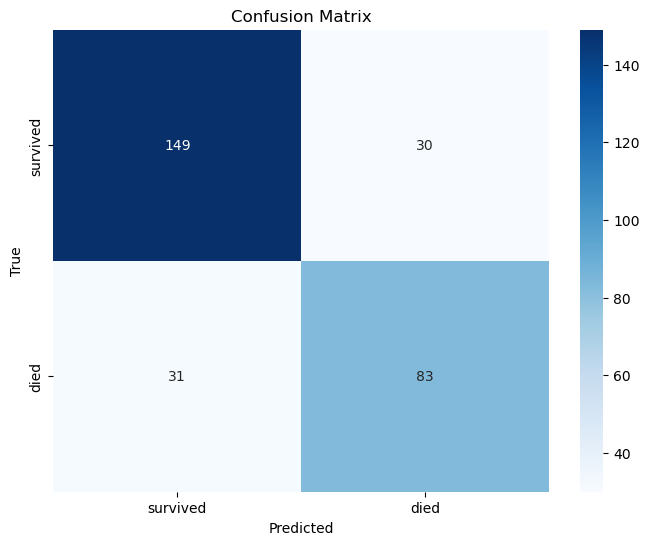

In [22]:
# Построение матрицы ошибок (confusion matrix)
labels = target_names=['survived', 'died']
cm = confusion_matrix(Y_test, pred)
print("Confusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Нормализовать признаки (StandardScaler или MinMaxScaler)

In [23]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [24]:
print('scaler.mean', scaler.mean_)
print('scaler.scale', scaler.scale_)

scaler.mean [ 0.37373737  2.31144781 29.60957912 33.54896145]
scaler.scale [ 0.48379515  0.83017802 14.24703748 51.67793332]


In [25]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), svm.LinearSVC())
pipe.fit(X_train, Y_train)  # apply scaling on training data

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [26]:
pred = pipe.predict(X_test)

# Оценка классификации
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)

# Вывод отчета о классификации
target_names=['survived', 'died']
class_rep = classification_report(Y_test, pred,  target_names=target_names)
print("Classification Report:")
print(class_rep)

Accuracy: 0.7508532423208191
Precision: 0.7204301075268817
Recall: 0.5877192982456141
F-measure: 0.6473429951690822
Classification Report:
              precision    recall  f1-score   support

    survived       0.77      0.85      0.81       179
        died       0.72      0.59      0.65       114

    accuracy                           0.75       293
   macro avg       0.74      0.72      0.73       293
weighted avg       0.75      0.75      0.75       293



Confusion Matrix:
[[153  26]
 [ 47  67]]


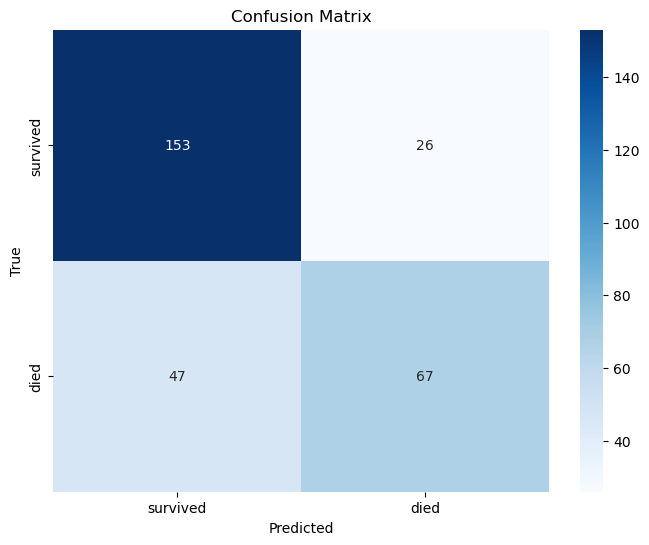

In [27]:
# Построение матрицы ошибок (confusion matrix)
labels = target_names=['survived', 'died']
cm = confusion_matrix(Y_test, pred)
print("Confusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()